In [1]:
from pathlib import Path 

import pandas as pd
import numpy as np
import plotnine as pn
import itertools as it

In [2]:
output = Path("./output/collected/run02")

# Forward Steps

Distribution of forward steps per trajectory.  Interested to find relatively narrow distribution of forward steps by algorithm by model.

In [19]:
dff = pd.read_parquet(output / "forward_steps.parquet")

In [20]:
dff.groupby(["algorithm", "model"]).aggregate(mn = ("forward_steps", np.mean), std = ("forward_steps", np.std))

/var/folders/md/4bj70ky11855zs8hgz7gb_0w0000gn/T/ipykernel_49616/1589207598.py:1: FutureWarning: The provided callable <function mean at 0x1114d8180> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
/var/folders/md/4bj70ky11855zs8hgz7gb_0w0000gn/T/ipykernel_49616/1589207598.py:1: FutureWarning: The provided callable <function std at 0x1114d82c0> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.


mn         std
algorithm model                                  
gistum    corr-normal       70.287644   42.181778
          garch             23.571036   16.212675
          glmm-poisson     820.264632   89.068985
          hmm               74.348724   48.274684
          ill-normal       949.853677   91.718078
          lotka-volterra    54.522486   25.193250
          normal            10.127814    1.746976
          rosenbrock       148.918784  142.945153
gistvb    corr-normal       75.276888   54.985933
          garch             16.319160    8.445522
          glmm-poisson     108.888594  104.050941
          hmm               40.110955   48.367091
          ill-normal      1037.854327  372.564122
          lotka-volterra    77.926063   28.286120
          normal            12.660380    1.450352
          rosenbrock       180.019610  177.813671
gistvm    corr-normal       74.221961   54.421716
          garch             15.861306    8.709809
          glmm-poisson     108.505653  105.863020
          hmm               39.067034   47.307502
          ill-normal      1036.788094  373.421209
          lotka-volterra    77.605428   28.303219
          normal            12.222861    1.389342
          rosenbrock       178.727264  176.422631
stan      corr-normal       -1.000000    0.000000
          garch             -1.000000    0.000000
          glmm-poisson      -1.000000    0.000000
          hmm               -1.000000    0.000000
          ill-normal        -1.000000    0.000000
          lotka-volterra    -1.000000    0.000000
          normal            -1.000000    0.000000
          rosenbrock        -1.000000    0.000000

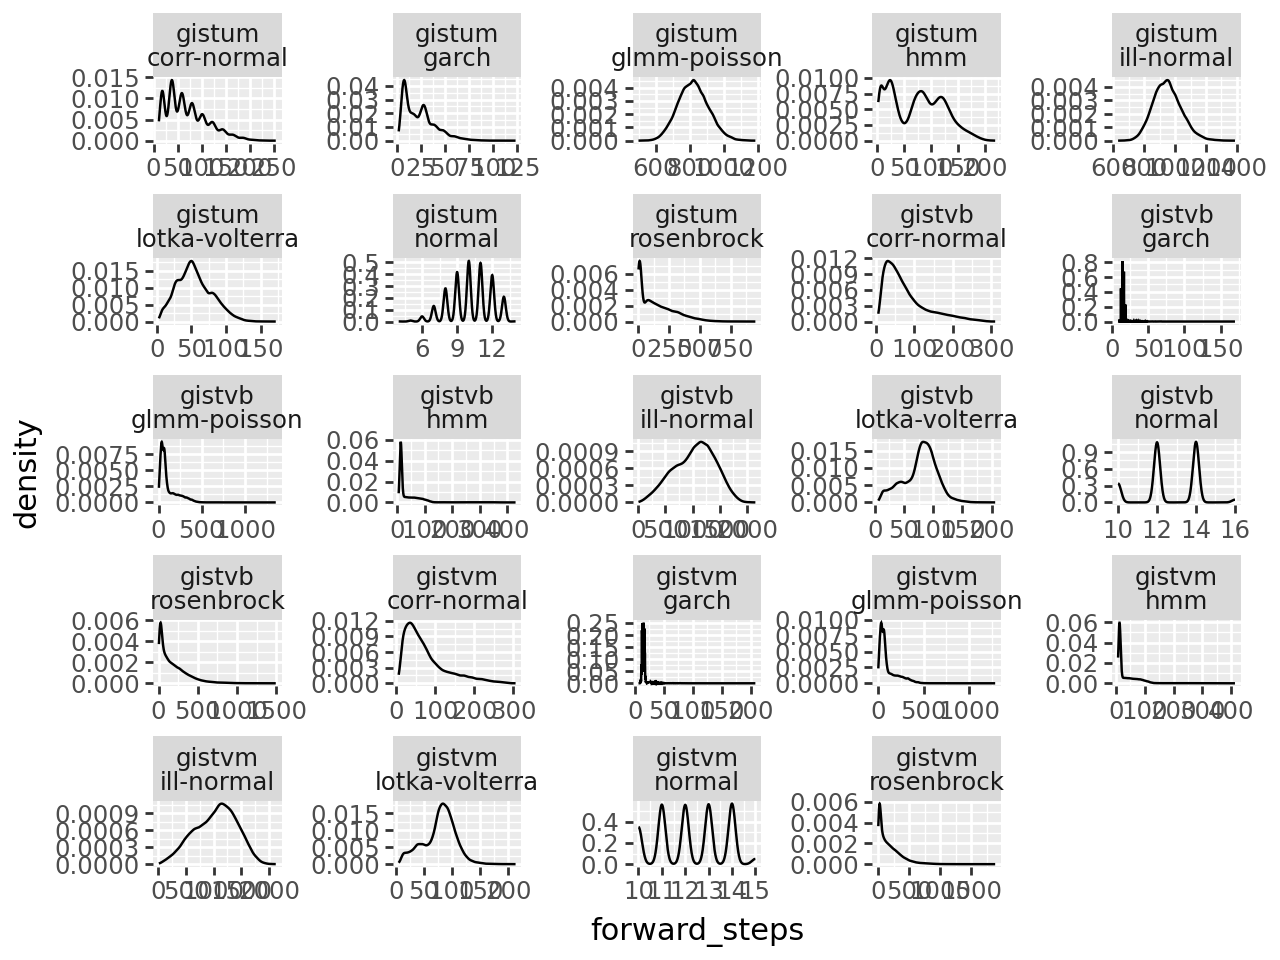

In [21]:
idx = dff["algorithm"] == "stan"
pn.ggplot(dff.loc[~idx, :], pn.aes("forward_steps")) + \
    pn.geom_density() + \
    pn.facet_wrap(["algorithm", "model"], scales = "free")

# Steps

Total number of leapfrog steps; mean number of proposal steps; mean number of steps before stopping criterion is satisfied.

In [6]:
dfs = pd.read_parquet(output / "steps.parquet")

In [7]:
dfs.columns

Index(['steps', 'mean_stop_steps', 'mean_proposal_steps', 'algorithm',
       'model'],
      dtype='object')

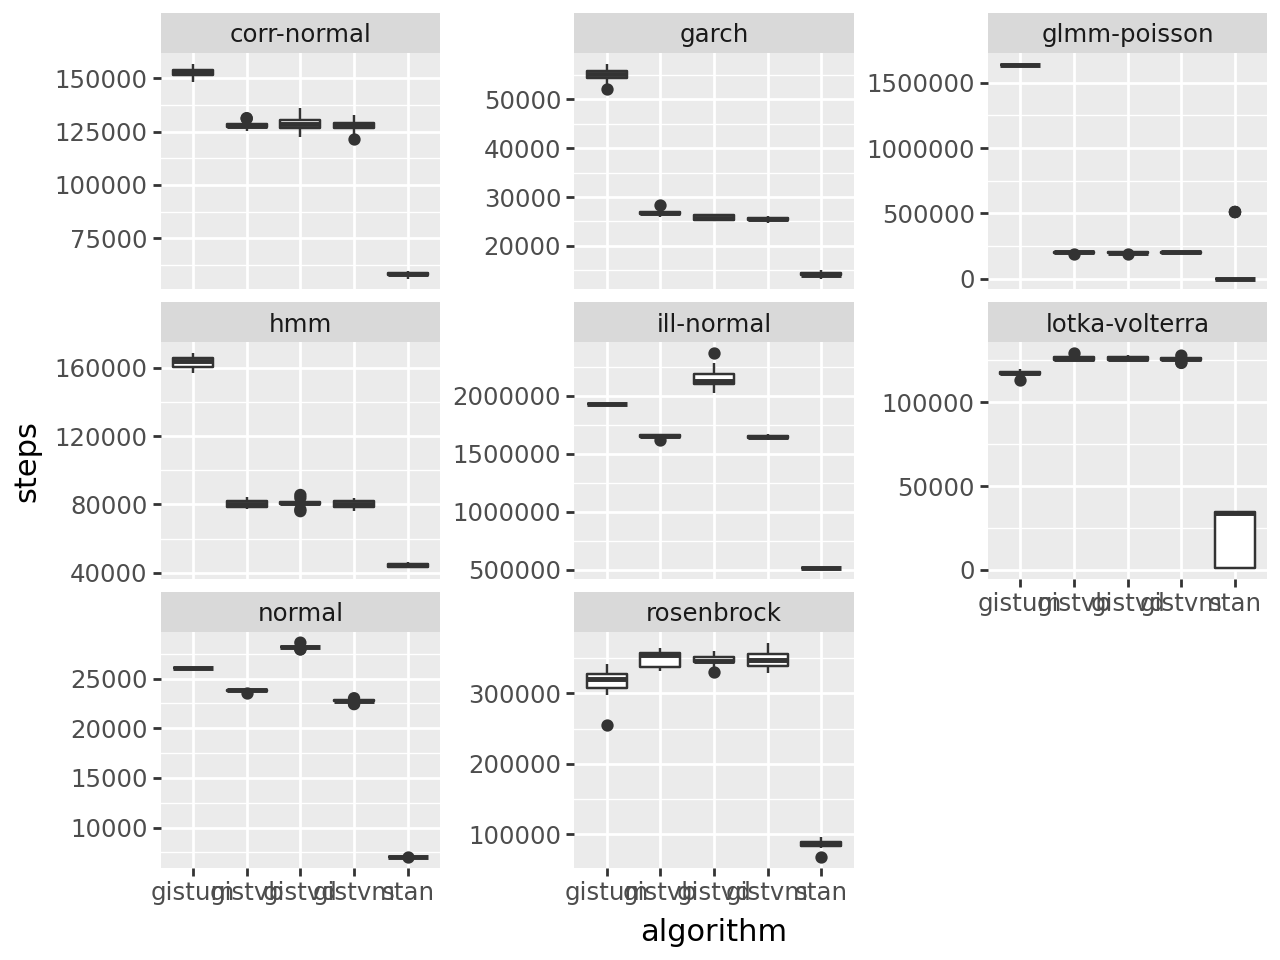

In [8]:
pn.ggplot(dfs, pn.aes("algorithm", "steps")) + \
    pn.geom_boxplot() + \
    pn.facet_wrap("~ model", scales = "free_y")

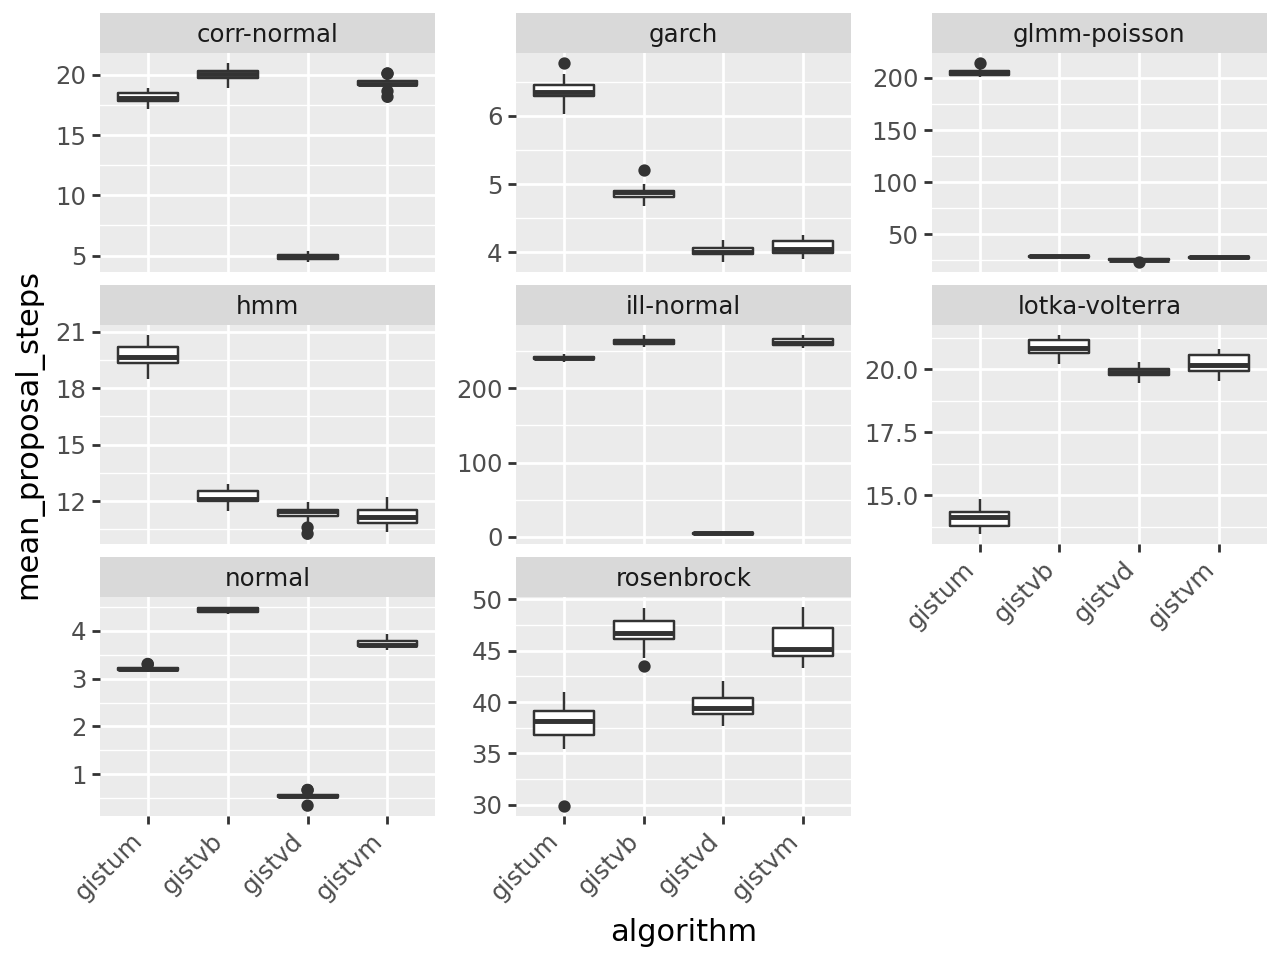

In [9]:
idx = dfs["algorithm"] == "stan"
pn.ggplot(dfs.loc[~idx, :], pn.aes("algorithm", "mean_proposal_steps")) + \
    pn.geom_boxplot() + \
    pn.facet_wrap("~ model", scales = "free_y") + \
    pn.theme(axis_text_x = pn.element_text(angle=45, hjust=1))

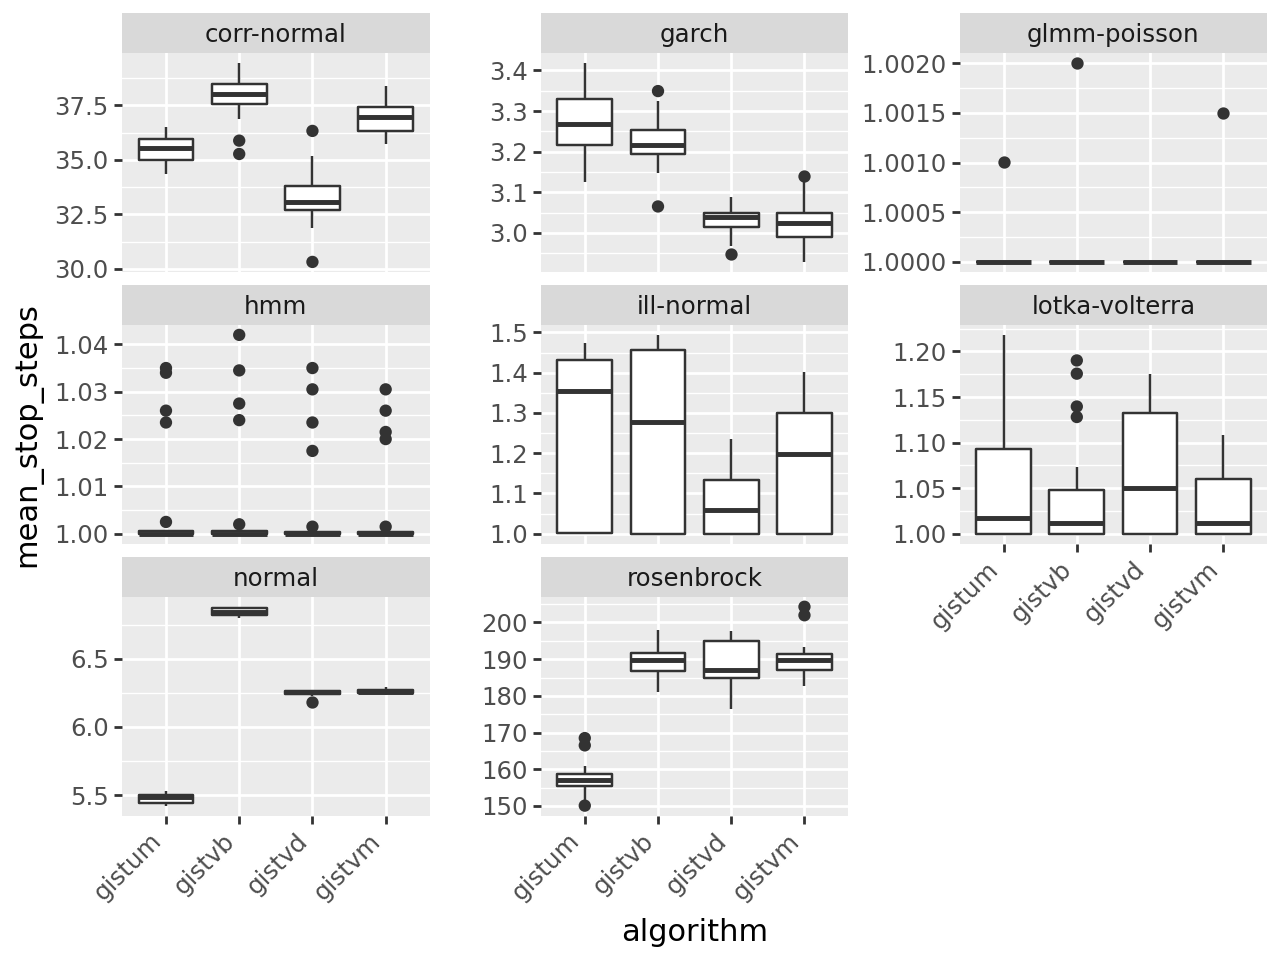

In [32]:
idx = dfs["algorithm"] == "stan"
pn.ggplot(dfs.loc[~idx, :], pn.aes("algorithm", "mean_stop_steps")) + \
    pn.geom_boxplot() + \
    pn.facet_wrap("~ model", scales = "free_y") + \
    pn.theme(axis_text_x = pn.element_text(angle=45, hjust=1))

# ESS

ESS(x) and ESS(x^2) per parameter

In [22]:
dfe = pd.read_parquet(output / "ess.parquet")

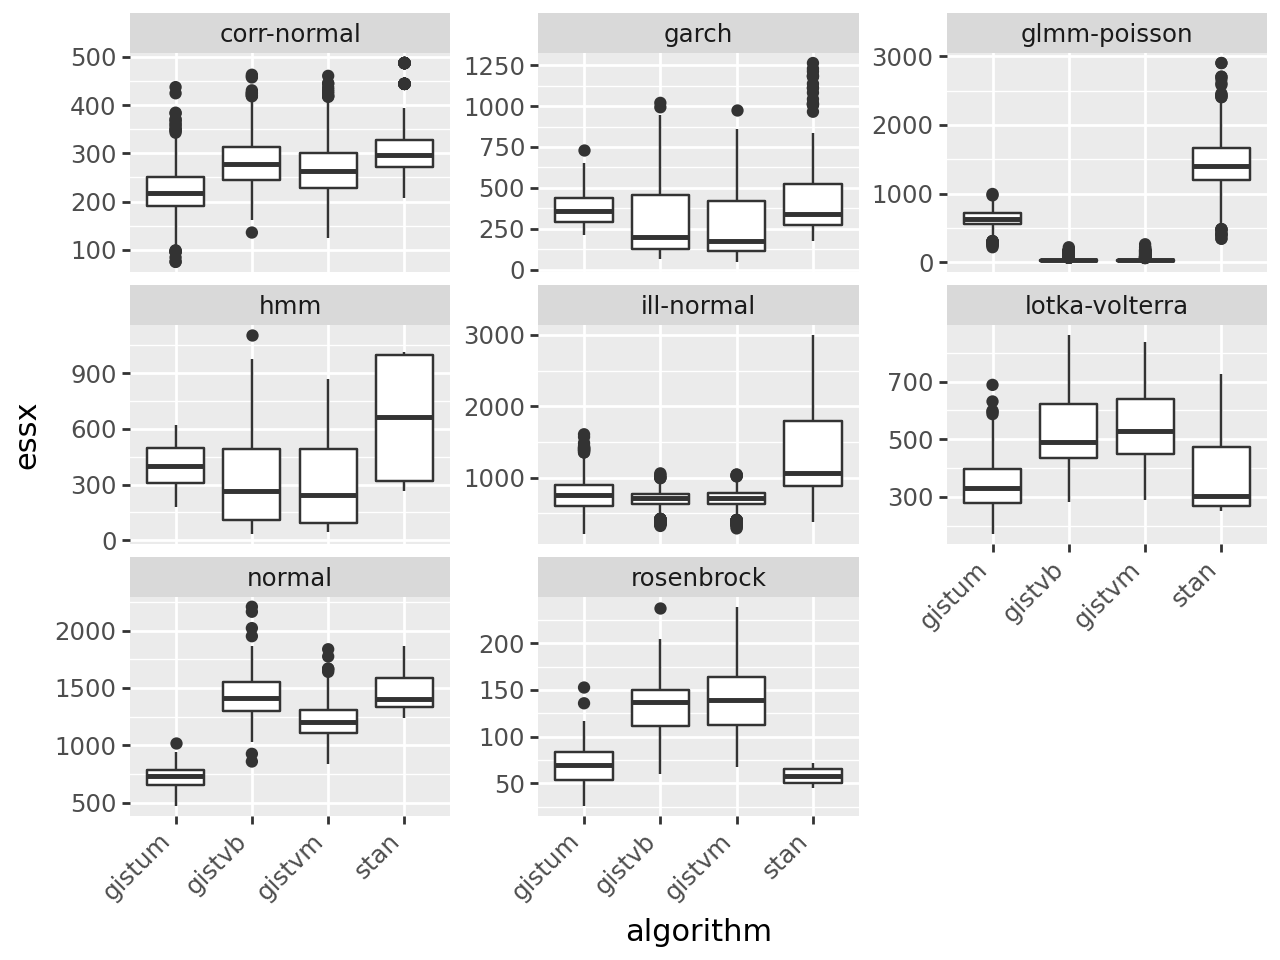

In [23]:
pn.ggplot(dfe, pn.aes("algorithm", "essx")) + \
    pn.geom_boxplot() + \
    pn.facet_wrap("~ model", scales = "free_y") + \
    pn.theme(axis_text_x = pn.element_text(angle=45, hjust=1))

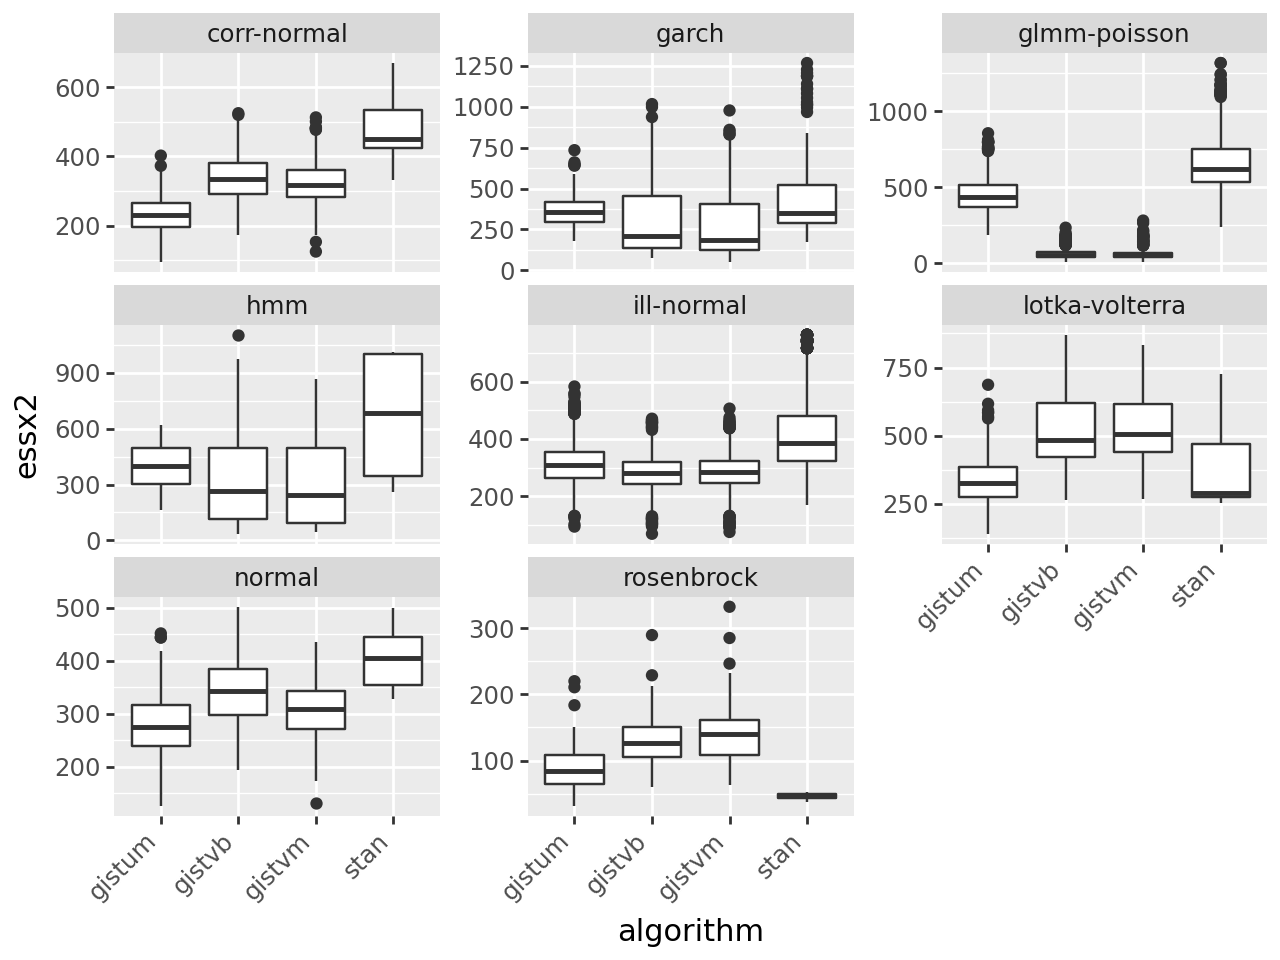

In [24]:
pn.ggplot(dfe, pn.aes("algorithm", "essx2")) + \
    pn.geom_boxplot() + \
    pn.facet_wrap("~ model", scales = "free_y") + \
    pn.theme(axis_text_x = pn.element_text(angle=45, hjust=1))

# RMSE

RMSE(x) and RMSE(x^2) across all parameters.

In [3]:
dfr = pd.read_parquet(output / "rmse.parquet")

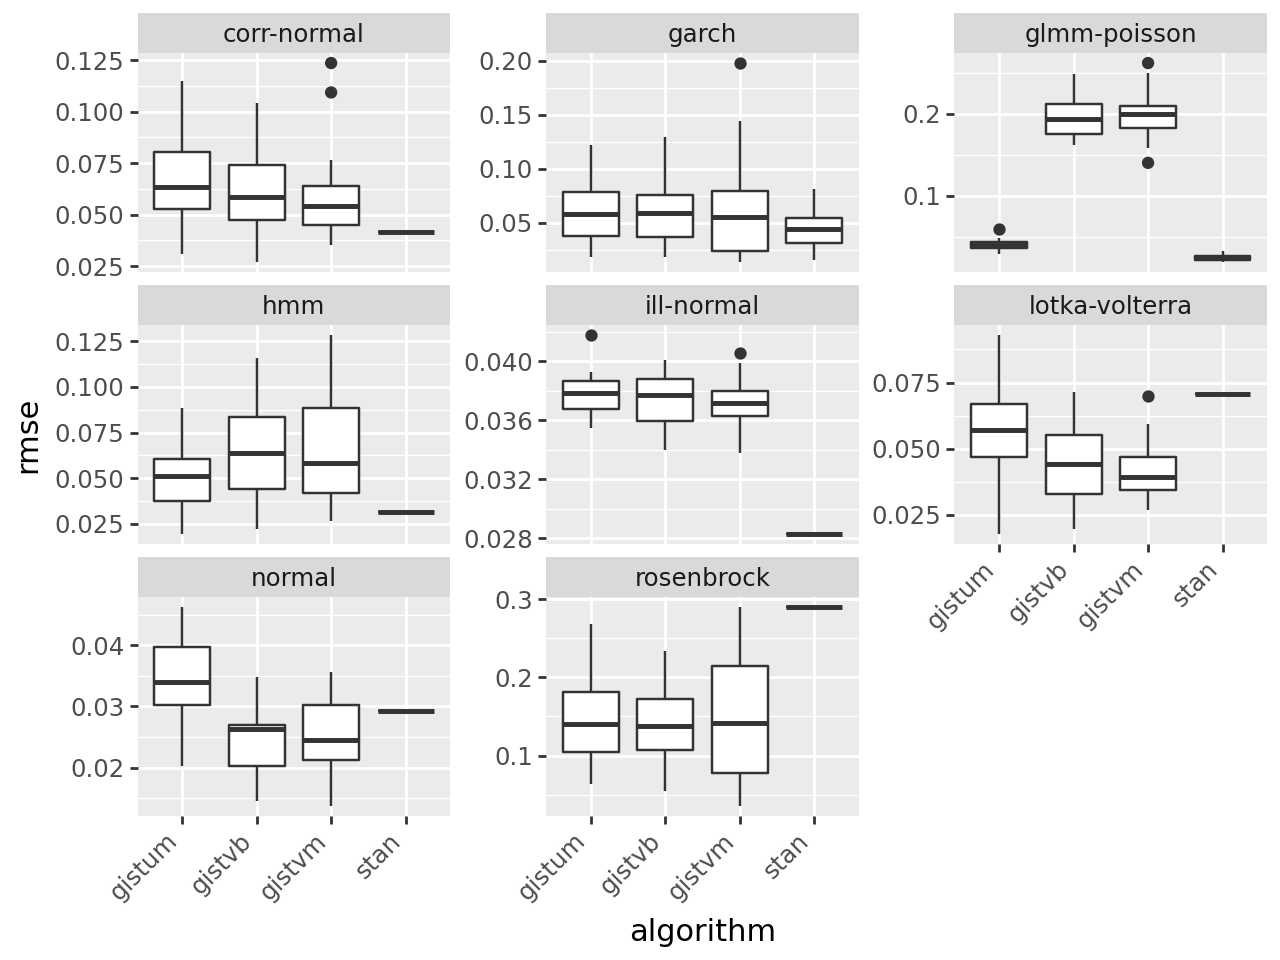

In [6]:
idx = dfr["algorithm"] == "stan"
pn.ggplot(dfr, pn.aes("algorithm", "rmse")) + \
    pn.geom_boxplot() + \
    pn.facet_wrap("~ model", scales = "free_y") + \
    pn.theme(axis_text_x = pn.element_text(angle=45, hjust=1))

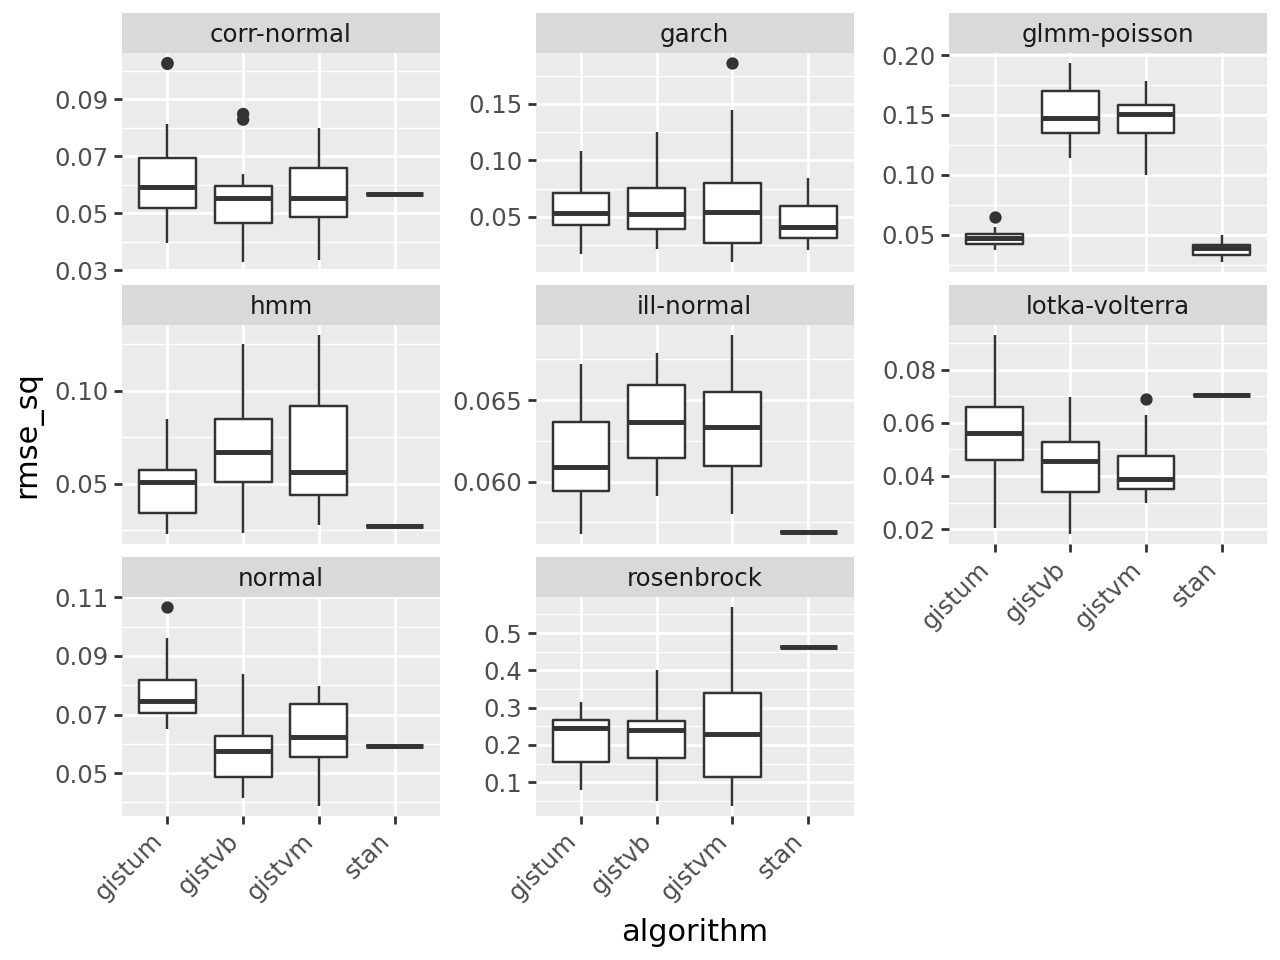

In [5]:
pn.ggplot(dfr, pn.aes("algorithm", "rmse_sq")) + \
    pn.geom_boxplot() + \
    pn.facet_wrap("~ model", scales = "free_y") + \
    pn.theme(axis_text_x = pn.element_text(angle=45, hjust=1))

# Acceptance Rate

Acceptance rate per replication.

In [4]:
dfa = pd.read_parquet(output / "acceptance_rate.parquet")

In [5]:
dfa.columns

Index(['acceptance_rate', 'algorithm', 'model'], dtype='object')

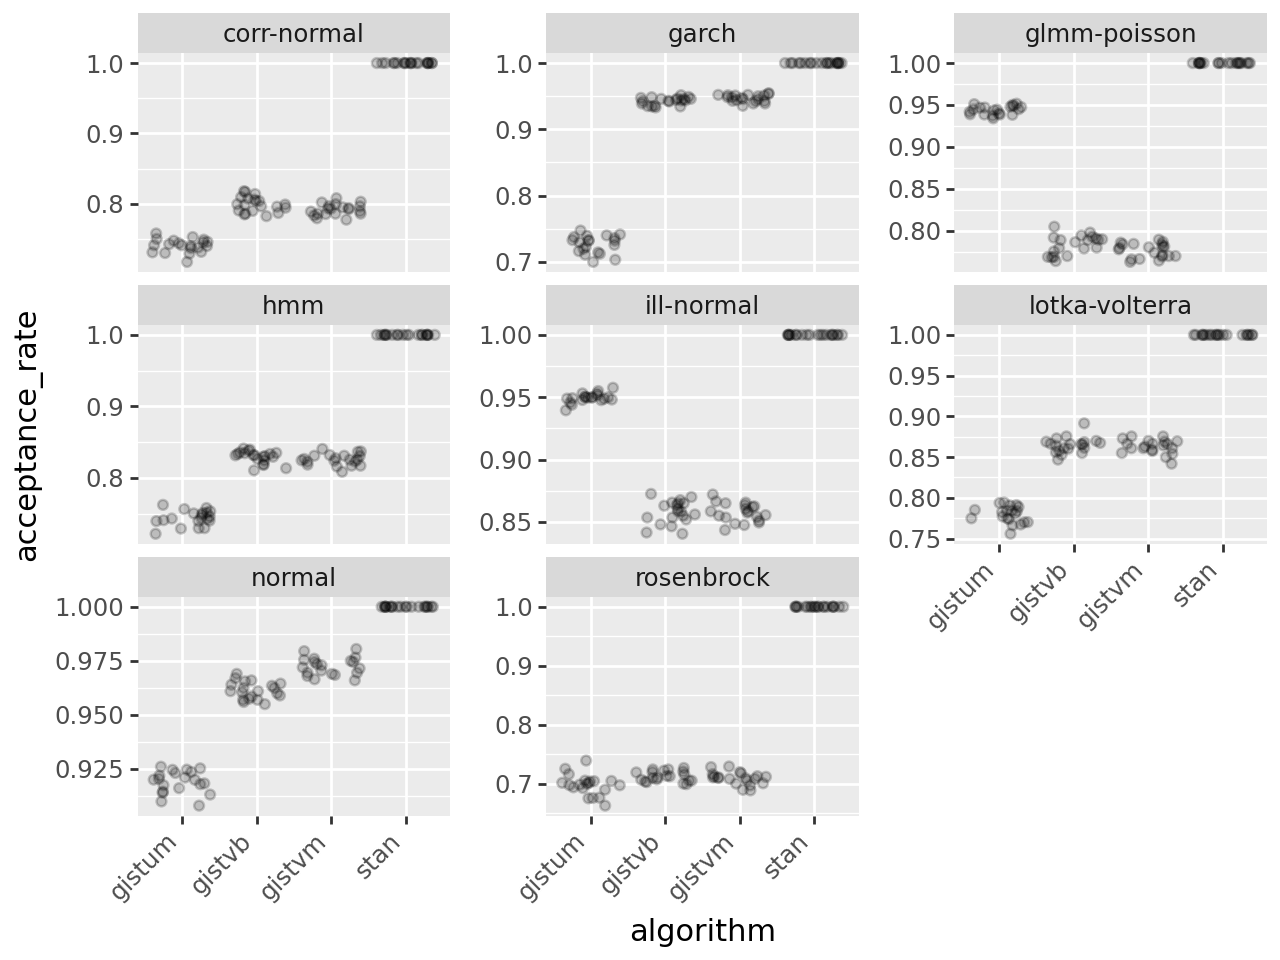

In [6]:
pn.ggplot(dfa, pn.aes("algorithm", "acceptance_rate")) + \
    pn.geom_jitter(alpha = 0.2) + \
    pn.facet_wrap("~ model", scales = "free_y") + \
    pn.theme(axis_text_x = pn.element_text(angle=45, hjust=1))

# MSJD

MSJD per replication.

In [28]:
dfm = pd.read_parquet(output / "msjd.parquet")

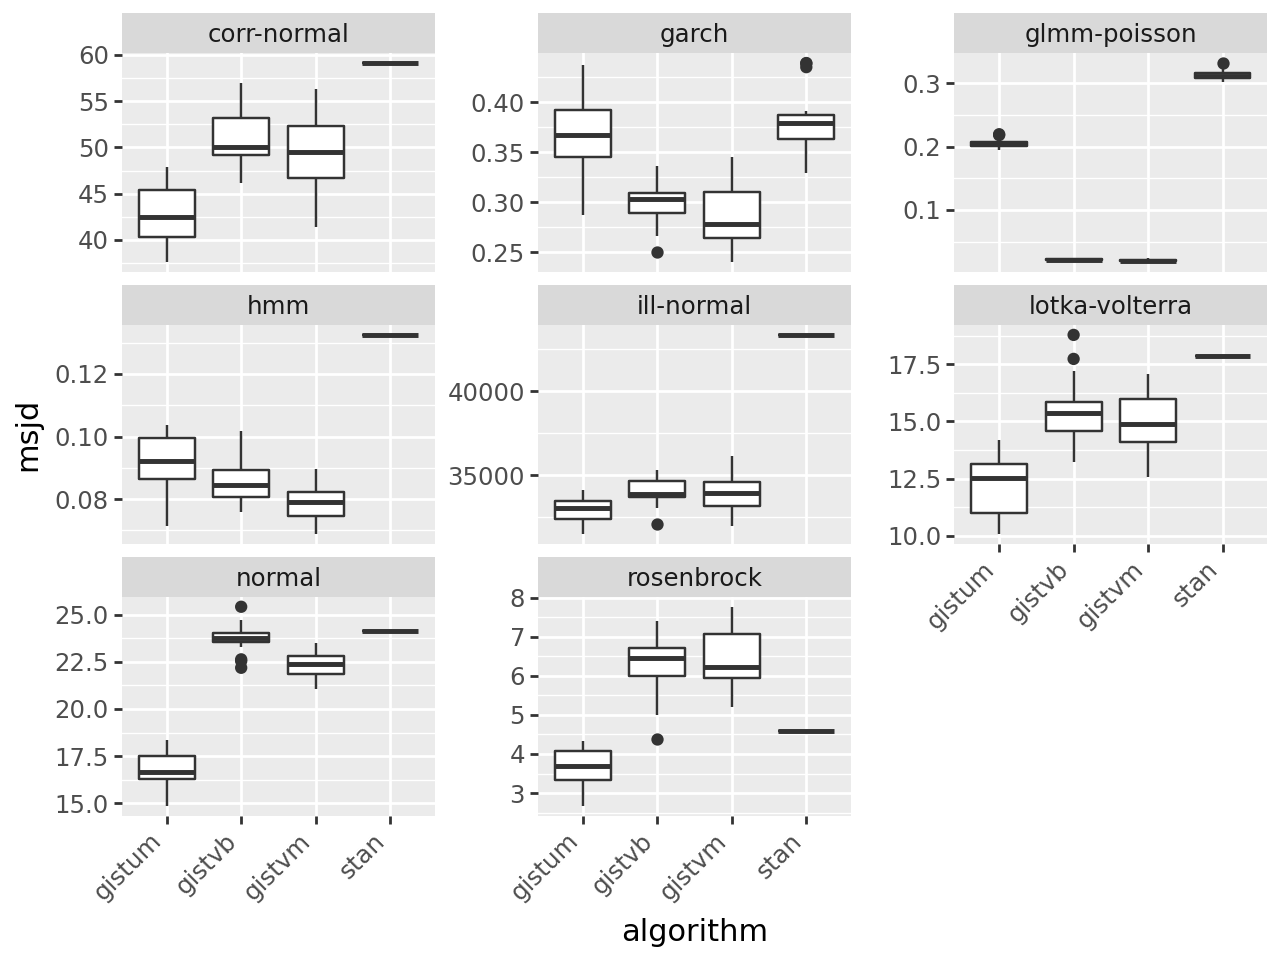

In [29]:
pn.ggplot(dfm, pn.aes("algorithm", "msjd")) + \
    pn.geom_boxplot() + \
    pn.facet_wrap("~ model", scales = "free_y") + \
    pn.theme(axis_text_x = pn.element_text(angle=45, hjust=1))